In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

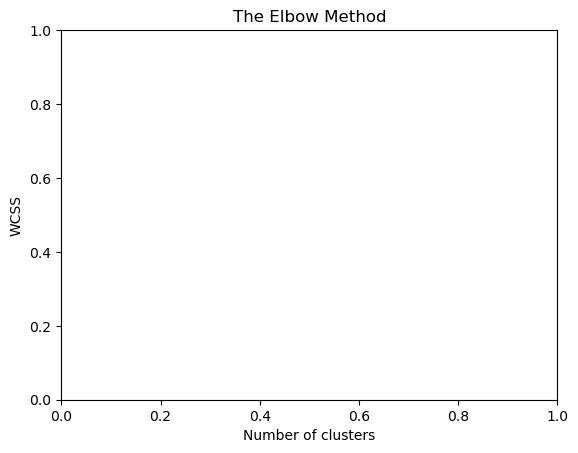

In [4]:
from sklearn.cluster import  OPTICS
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
from sklearn.cluster import OPTICS

In [14]:
af =OPTICS( min_samples=5,  metric='minkowski', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30,  n_jobs=None)
label=af.fit_predict(X)

C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Use

C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\spavi\Anaconda3

In [15]:
#To add a extra column for cluster group
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,35
3,4,Female,23,16,77,29
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,57
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,57
198,199,Male,32,137,18,-1


In [16]:
supervised['Cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,8
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [20]:
supervised.to_csv("cluster.csv",index=False)

In [17]:
supervised.columns[3]

'Annual Income (k$)'

In [18]:
supervised.columns[4]

'Spending Score (1-100)'

C:\Users\spavi\Anaconda3\Anaconda\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


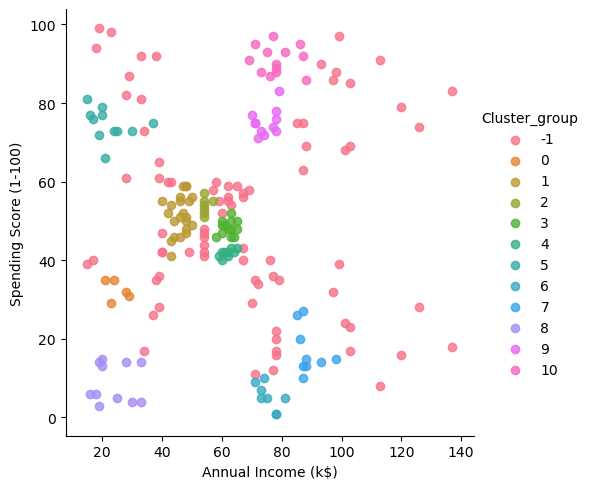

In [19]:
#seaborn for graphical use
import seaborn as sns
#sns.lmplot for graph,x axis is annual income ,y  axis is spending score ,hue is clustered column,fit_reg for fit_regression,legend for
#cluster colors and legend_out for cluster group name
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)